In [ ]:
#Credict Scoring using  DecisionTree

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay,classification_report,mean_squared_error,mean_absolute_error,r2_score

In [ ]:
df = pd.read_csv('/content/CreditScoring.csv')
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [ ]:
df.describe()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
count,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4.455000e+03,4.455000e+03,4.455000e+03,4455.000000,4455.000000
mean,1.281257,7.987205,2.657015,46.441751,37.077666,1.879012,1.173513,1.675870,55.568799,7.633170e+05,1.060341e+06,4.043820e+05,1039.021773,1462.875645
std,0.450162,8.173444,1.610467,14.655225,10.984856,0.643748,0.378733,0.954035,19.515878,8.703625e+06,1.021757e+07,6.344253e+06,474.543007,628.089913
min,0.000000,0.000000,0.000000,6.000000,18.000000,0.000000,1.000000,0.000000,35.000000,0.000000e+00,0.000000e+00,0.000000e+00,100.000000,105.000000
25%,1.000000,2.000000,2.000000,36.000000,28.000000,2.000000,1.000000,1.000000,35.000000,8.000000e+01,0.000000e+00,0.000000e+00,700.000000,1117.500000
50%,1.000000,5.000000,2.000000,48.000000,36.000000,2.000000,1.000000,1.000000,51.000000,1.200000e+02,3.500000e+03,0.000000e+00,1000.000000,1400.000000
75%,2.000000,12.000000,4.000000,60.000000,45.000000,2.000000,1.000000,3.000000,72.000000,1.660000e+02,6.000000e+03,0.000000e+00,1300.000000,1692.000000
max,2.000000,48.000000,6.000000,72.000000,68.000000,5.000000,2.000000,4.000000,180.000000,1.000000e+08,1.000000e+08,1.000000e+08,5000.000000,11140.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Status     4455 non-null   int64
 1   Seniority  4455 non-null   int64
 2   Home       4455 non-null   int64
 3   Time       4455 non-null   int64
 4   Age        4455 non-null   int64
 5   Marital    4455 non-null   int64
 6   Records    4455 non-null   int64
 7   Job        4455 non-null   int64
 8   Expenses   4455 non-null   int64
 9   Income     4455 non-null   int64
 10  Assets     4455 non-null   int64
 11  Debt       4455 non-null   int64
 12  Amount     4455 non-null   int64
 13  Price      4455 non-null   int64
dtypes: int64(14)
memory usage: 487.4 KB


In [ ]:
x=df.drop('Status',axis=1)
y=df['Status']
print(x.shape)
print(y.shape)

(4455, 13)
(4455,)


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
Model=DecisionTreeClassifier()
Model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=Model.predict(X_test)
print(y_pred)

[2 1 1 1 1 1 2 1 1 1 2 2 1 2 1 1 2 1 2 1 1 1 1 2 2 2 1 2 2 1 1 1 2 1 2 1 1
 1 1 2 1 2 1 1 1 1 1 2 2 2 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 2 1 1 1 1 1 2 2
 2 2 2 2 2 1 1 1 1 2 2 2 1 2 1 2 1 2 1 2 2 1 2 2 1 2 1 2 2 1 1 1 1 2 2 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 2 2 1
 1 2 1 1 1 1 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 2 2 1 1 1 1 2 1
 1 1 1 1 2 1 1 1 2 1 1 2 2 1 1 1 1 2 1 1 2 1 1 2 1 2 1 1 2 1 1 1 1 1 1 1 1
 1 1 1 2 2 1 1 2 1 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 2 2 1 2 1 1 2 1 1 1 1 2
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1
 2 1 2 1 1 2 1 1 1 2 1 1 1 1 1 2 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 2 2 2 1 1 1 1 1 1 1 1 2 1 2 1 1
 2 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1
 2 2 1 1 1 2 1 1 1 1 1 2 

In [ ]:
accuracy_score(y_test,y_pred)*100

72.9517396184063

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.79      0.83      0.81       612
           2       0.58      0.51      0.54       279

    accuracy                           0.73       891
   macro avg       0.68      0.67      0.67       891
weighted avg       0.72      0.73      0.72       891



In [ ]:
print(confusion_matrix(y_test,y_pred))

[[508 104]
 [137 142]]


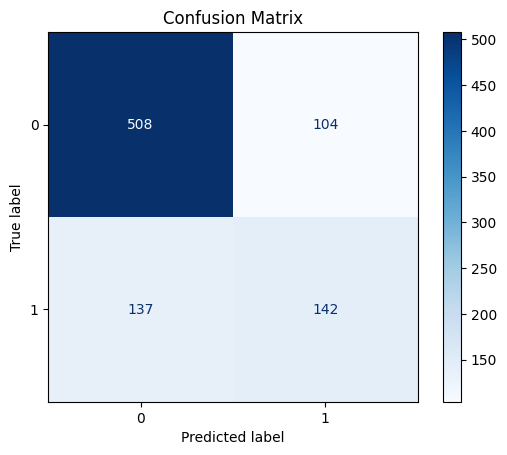

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')

plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(mean_squared_error(y_test,y_pred))

0.27048260381593714


In [ ]:
print(mean_absolute_error(y_test,y_pred))

0.27048260381593714


In [ ]:
print(r2_score(y_test,y_pred))

-0.25759013282732424


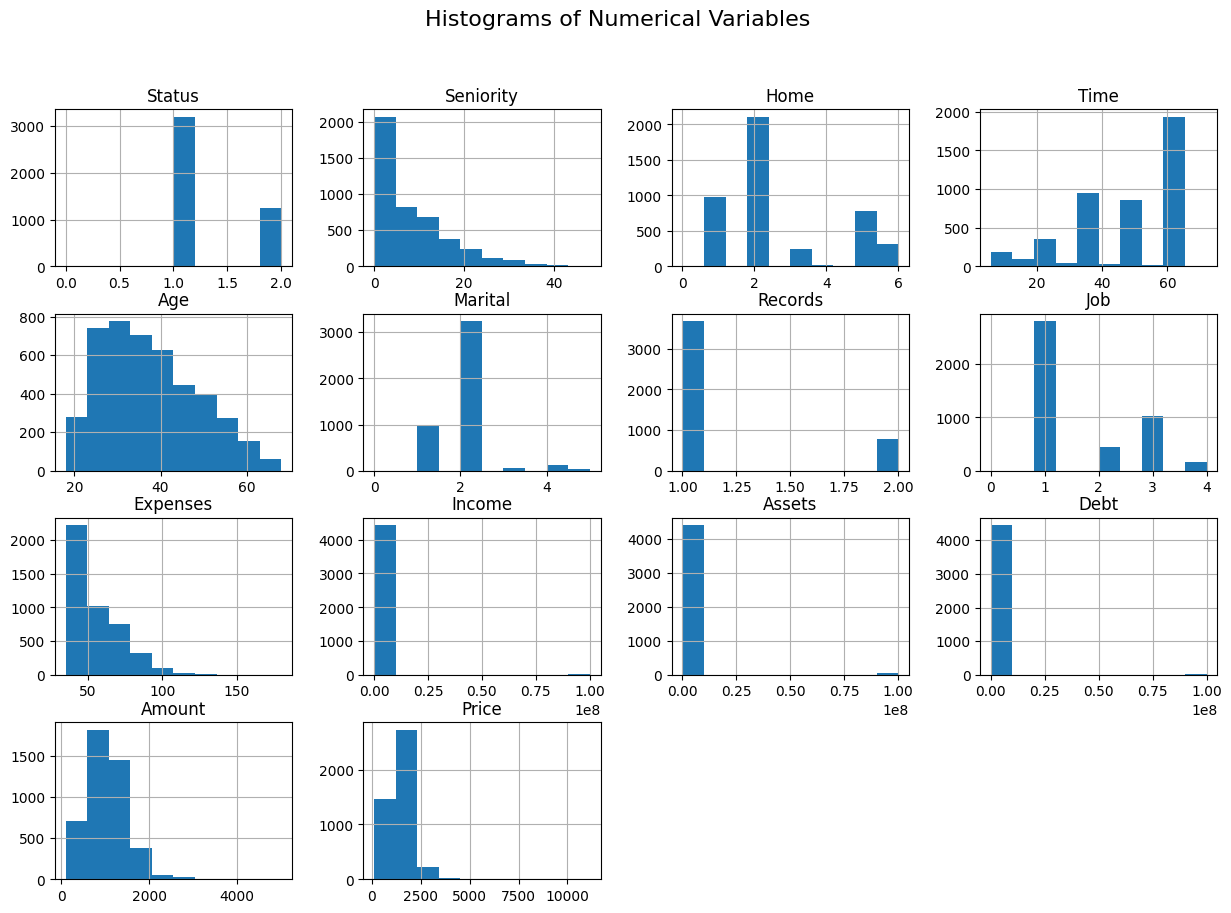

In [ ]:
# Visualize histograms
df.hist(figsize=(15, 10))
plt.suptitle("Histograms of Numerical Variables", fontsize=16)
plt.show()


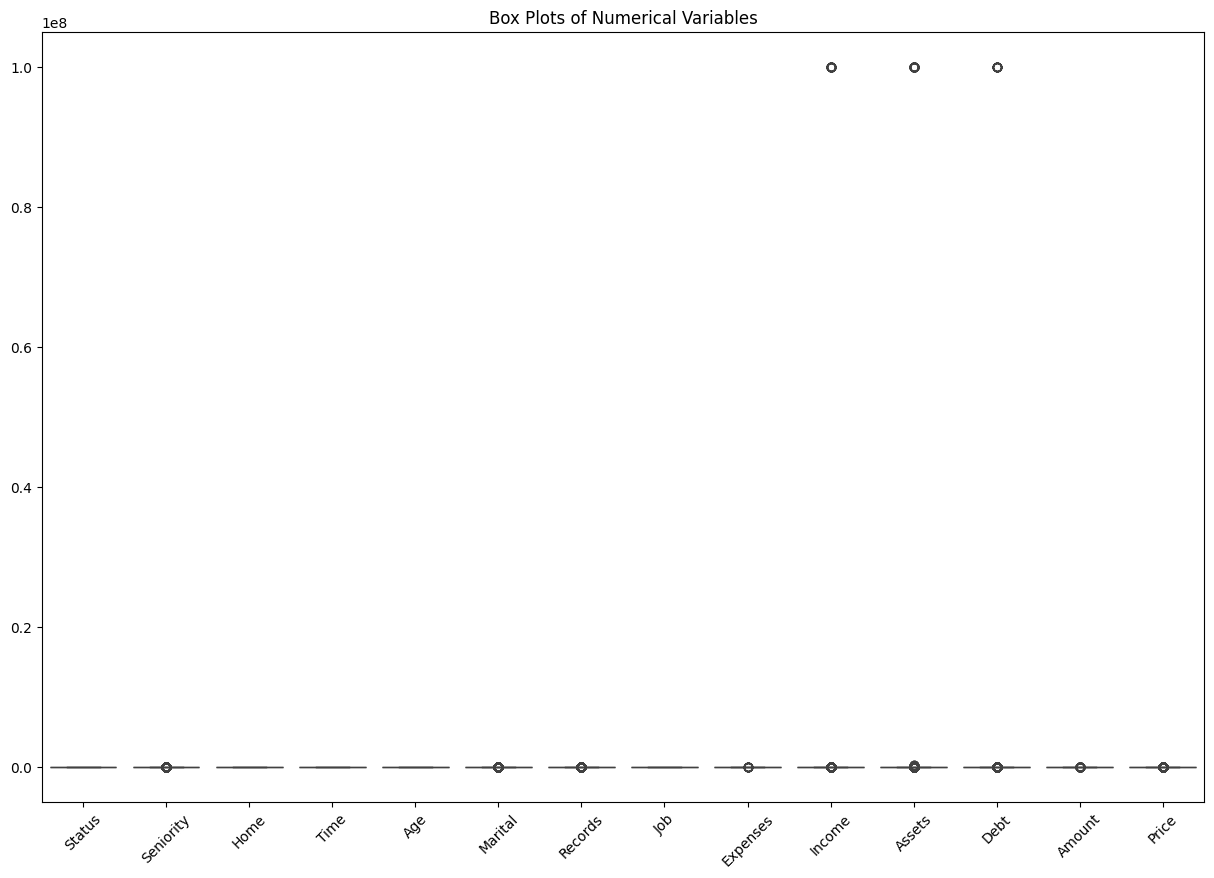

In [ ]:
# Visualize box plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title("Box Plots of Numerical Variables")
plt.xticks(rotation=45)
plt.show()

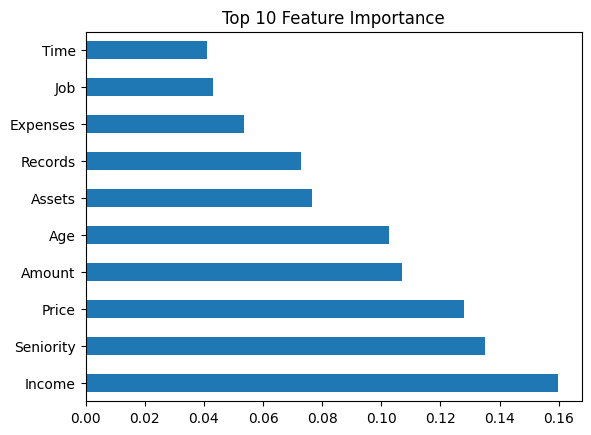

In [ ]:
feature_importance = pd.Series(Model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importance")
plt.show()